<a href="https://colab.research.google.com/github/Aarjavjain22/Neural-Network---ML-Lab/blob/main/a2_part2_aarjavja_suhachow_Latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchinfo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torchinfo import summary
import torch.optim as optim
import time
import torch.utils.data as data
import os, torch

In [ ]:
df=pd.read_csv('/content/dataset.csv')

In [ ]:
df

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1
...,...,...,...,...,...,...,...,...
761,9,89,62,0,0,22.5,e,0
762,10,101,76,48,180,d,0.171,0
763,2,122,70,27,b,36.8,0.34,0
764,c,121,72,23,112,26.2,0.245,0


In [ ]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      766 non-null    object
 1   f2      766 non-null    object
 2   f3      766 non-null    int64 
 3   f4      766 non-null    object
 4   f5      766 non-null    object
 5   f6      766 non-null    object
 6   f7      766 non-null    object
 7   target  766 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 48.0+ KB


,f3,target
count,766.000000,766.000000
mean,69.118799,0.349869
std,19.376901,0.477240
min,0.000000,0.000000
25%,62.500000,0.000000
50%,72.000000,0.000000
75%,80.000000,1.000000
max,122.000000,1.000000


In [ ]:
for col in df.columns:
    u = pd.Series(df[col].unique())
    print(f"[{col}] unique (sample):")
    print(u.to_string(index=False), "\n")

[f1] unique (sample):
 6
 1
 8
 0
 5
 3
10
 2
 4
 7
 9
11
13
15
17
12
14
 c 

[f2] unique (sample):
148
 85
183
 89
137
116
 78
115
197
125
110
168
139
189
166
100
118
107
103
126
 99
196
119
143
147
 97
145
117
109
158
 88
 92
122
138
102
 90
111
180
133
106
171
159
146
 71
105
101
176
150
 73
187
 84
 44
141
114
 95
129
 79
  0
 62
131
112
113
 74
 83
136
 80
123
 81
134
142
144
 93
163
151
 96
155
 76
160
124
162
132
120
173
170
128
108
154
 57
156
153
188
152
104
 87
 75
179
130
194
181
135
184
140
177
164
 91
165
 86
193
191
161
167
 77
182
157
178
 61
 98
127
 82
 72
172
 94
175
195
 68
186
198
121
 67
174
199
 56
169
149
 65
190
  f 

[f3] unique (sample):
 72
 66
 64
 40
 74
 50
  0
 70
 96
 92
 80
 60
 84
 30
 88
 90
 94
 76
 82
 75
 58
 78
 68
110
 56
 62
 85
 86
 48
 44
 65
108
 55
122
 54
 52
 98
104
 95
 46
102
100
 61
 24
 38
106
114 

[f4] unique (sample):
35
29
 0
23
32
45
19
47
38
30
41
33
26
15
36
11
31
37
42
25
18
24
39
27
21
34
10
60
13
20
22
28
54
40
51
56
14
17
50

In [ ]:
df_clean = df.copy()
obj = df_clean.select_dtypes(include=["object"]).columns
df_clean[obj] = df_clean[obj].apply(lambda s: s.str.strip().str.lower())
obj = df_clean.select_dtypes(include=["object"]).columns
for c in obj:
    df_clean[c] = df_clean[c].astype(str).str.strip().str.lower()
temp = {"": np.nan, "na": np.nan, "n/a": np.nan, "none": np.nan,"null": np.nan, "-": np.nan, "--": np.nan}
df_clean[obj] = df_clean[obj].replace(temp)
df_clean[obj] = df_clean[obj].replace(r"^[a-zA-Z]+$", np.nan, regex=True)
df_clean[obj] = (df_clean[obj].replace({",": "", "%": ""}, regex=True))


In [ ]:
df_clean

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1
...,...,...,...,...,...,...,...,...
761,9,89,62,0,0,22.5,NaN,0
762,10,101,76,48,180,NaN,0.171,0
763,2,122,70,27,NaN,36.8,0.34,0
764,NaN,121,72,23,112,26.2,0.245,0


In [ ]:
for col in df_clean.columns:
    u = pd.Series(df_clean[col].unique())
    print(f"[{col}] unique (sample):")
    print(u.to_string(index=False), "\n")

[f1] unique (sample):
  6
  1
  8
  0
  5
  3
 10
  2
  4
  7
  9
 11
 13
 15
 17
 12
 14
NaN 

[f2] unique (sample):
148
 85
183
 89
137
116
 78
115
197
125
110
168
139
189
166
100
118
107
103
126
 99
196
119
143
147
 97
145
117
109
158
 88
 92
122
138
102
 90
111
180
133
106
171
159
146
 71
105
101
176
150
 73
187
 84
 44
141
114
 95
129
 79
  0
 62
131
112
113
 74
 83
136
 80
123
 81
134
142
144
 93
163
151
 96
155
 76
160
124
162
132
120
173
170
128
108
154
 57
156
153
188
152
104
 87
 75
179
130
194
181
135
184
140
177
164
 91
165
 86
193
191
161
167
 77
182
157
178
 61
 98
127
 82
 72
172
 94
175
195
 68
186
198
121
 67
174
199
 56
169
149
 65
190
NaN 

[f3] unique (sample):
 72
 66
 64
 40
 74
 50
  0
 70
 96
 92
 80
 60
 84
 30
 88
 90
 94
 76
 82
 75
 58
 78
 68
110
 56
 62
 85
 86
 48
 44
 65
108
 55
122
 54
 52
 98
104
 95
 46
102
100
 61
 24
 38
106
114 

[f4] unique (sample):
 35
 29
  0
 23
 32
 45
 19
 47
 38
 30
 41
 33
 26
 15
 36
 11
 31
 37
 42
 25
 18
 24
 39
 27
 2

Now that I have updated random characters with NAN, I will now replace the same NAN with respective medians.

In [ ]:
numeric_cols = ["f1","f2","f3","f4","f5","f6","f7","target"]
df_clean[numeric_cols] = df_clean[numeric_cols].apply(pd.to_numeric, errors="coerce")
med = df_clean[numeric_cols].median(numeric_only=True)
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(med)
print(df_clean[numeric_cols].isna().sum())

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
target    0
dtype: int64


In [ ]:
df_clean

,f1,f2,f3,f4,f5,f6,f7,target
0,6.0,148.0,72,35.0,0.0,33.6,0.627,1
1,1.0,85.0,66,29.0,0.0,26.6,0.351,0
2,8.0,183.0,64,0.0,0.0,23.3,0.672,1
3,1.0,89.0,66,23.0,94.0,28.1,0.167,0
4,0.0,137.0,40,35.0,168.0,43.1,2.288,1
...,...,...,...,...,...,...,...,...
761,9.0,89.0,62,0.0,0.0,22.5,0.374,0
762,10.0,101.0,76,48.0,180.0,32.0,0.171,0
763,2.0,122.0,70,27.0,36.0,36.8,0.340,0
764,3.0,121.0,72,23.0,112.0,26.2,0.245,0


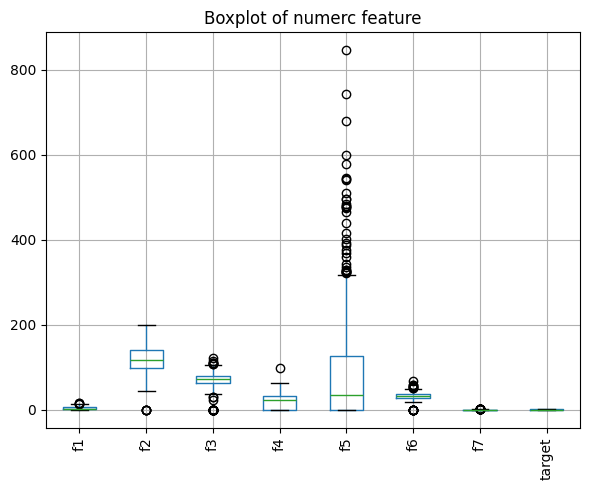

In [ ]:
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(max(6, 0.6*len(num_cols)), 5))
df_clean[num_cols].boxplot(rot=90)
plt.title("Boxplot of numerc feature")
plt.tight_layout()
plt.show()

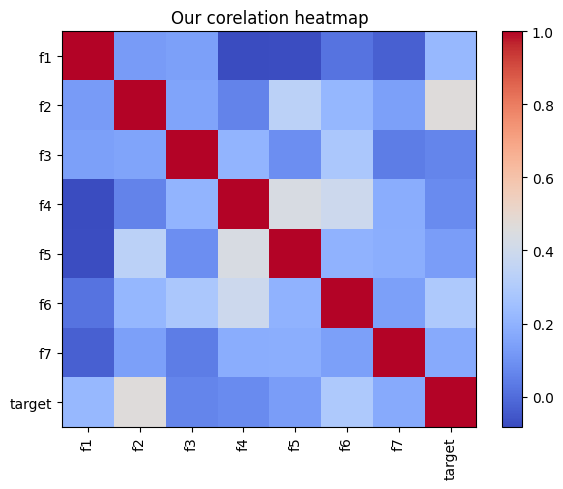

In [ ]:
import matplotlib.pyplot as plt
num_cols=df_clean.select_dtypes(include=[np.number]).columns
corr = df_clean[num_cols].corr(numeric_only=True).fillna(0)
plt.figure(figsize=(6,5))
plt.imshow(corr, aspect='auto',interpolation='nearest',cmap='coolwarm')
plt.title("Our corelation heatmap")
plt.colorbar()
plt.xticks(range(len(num_cols)),num_cols,rotation=90)
plt.yticks(range(len(num_cols)),num_cols)
plt.tight_layout()
plt.show()

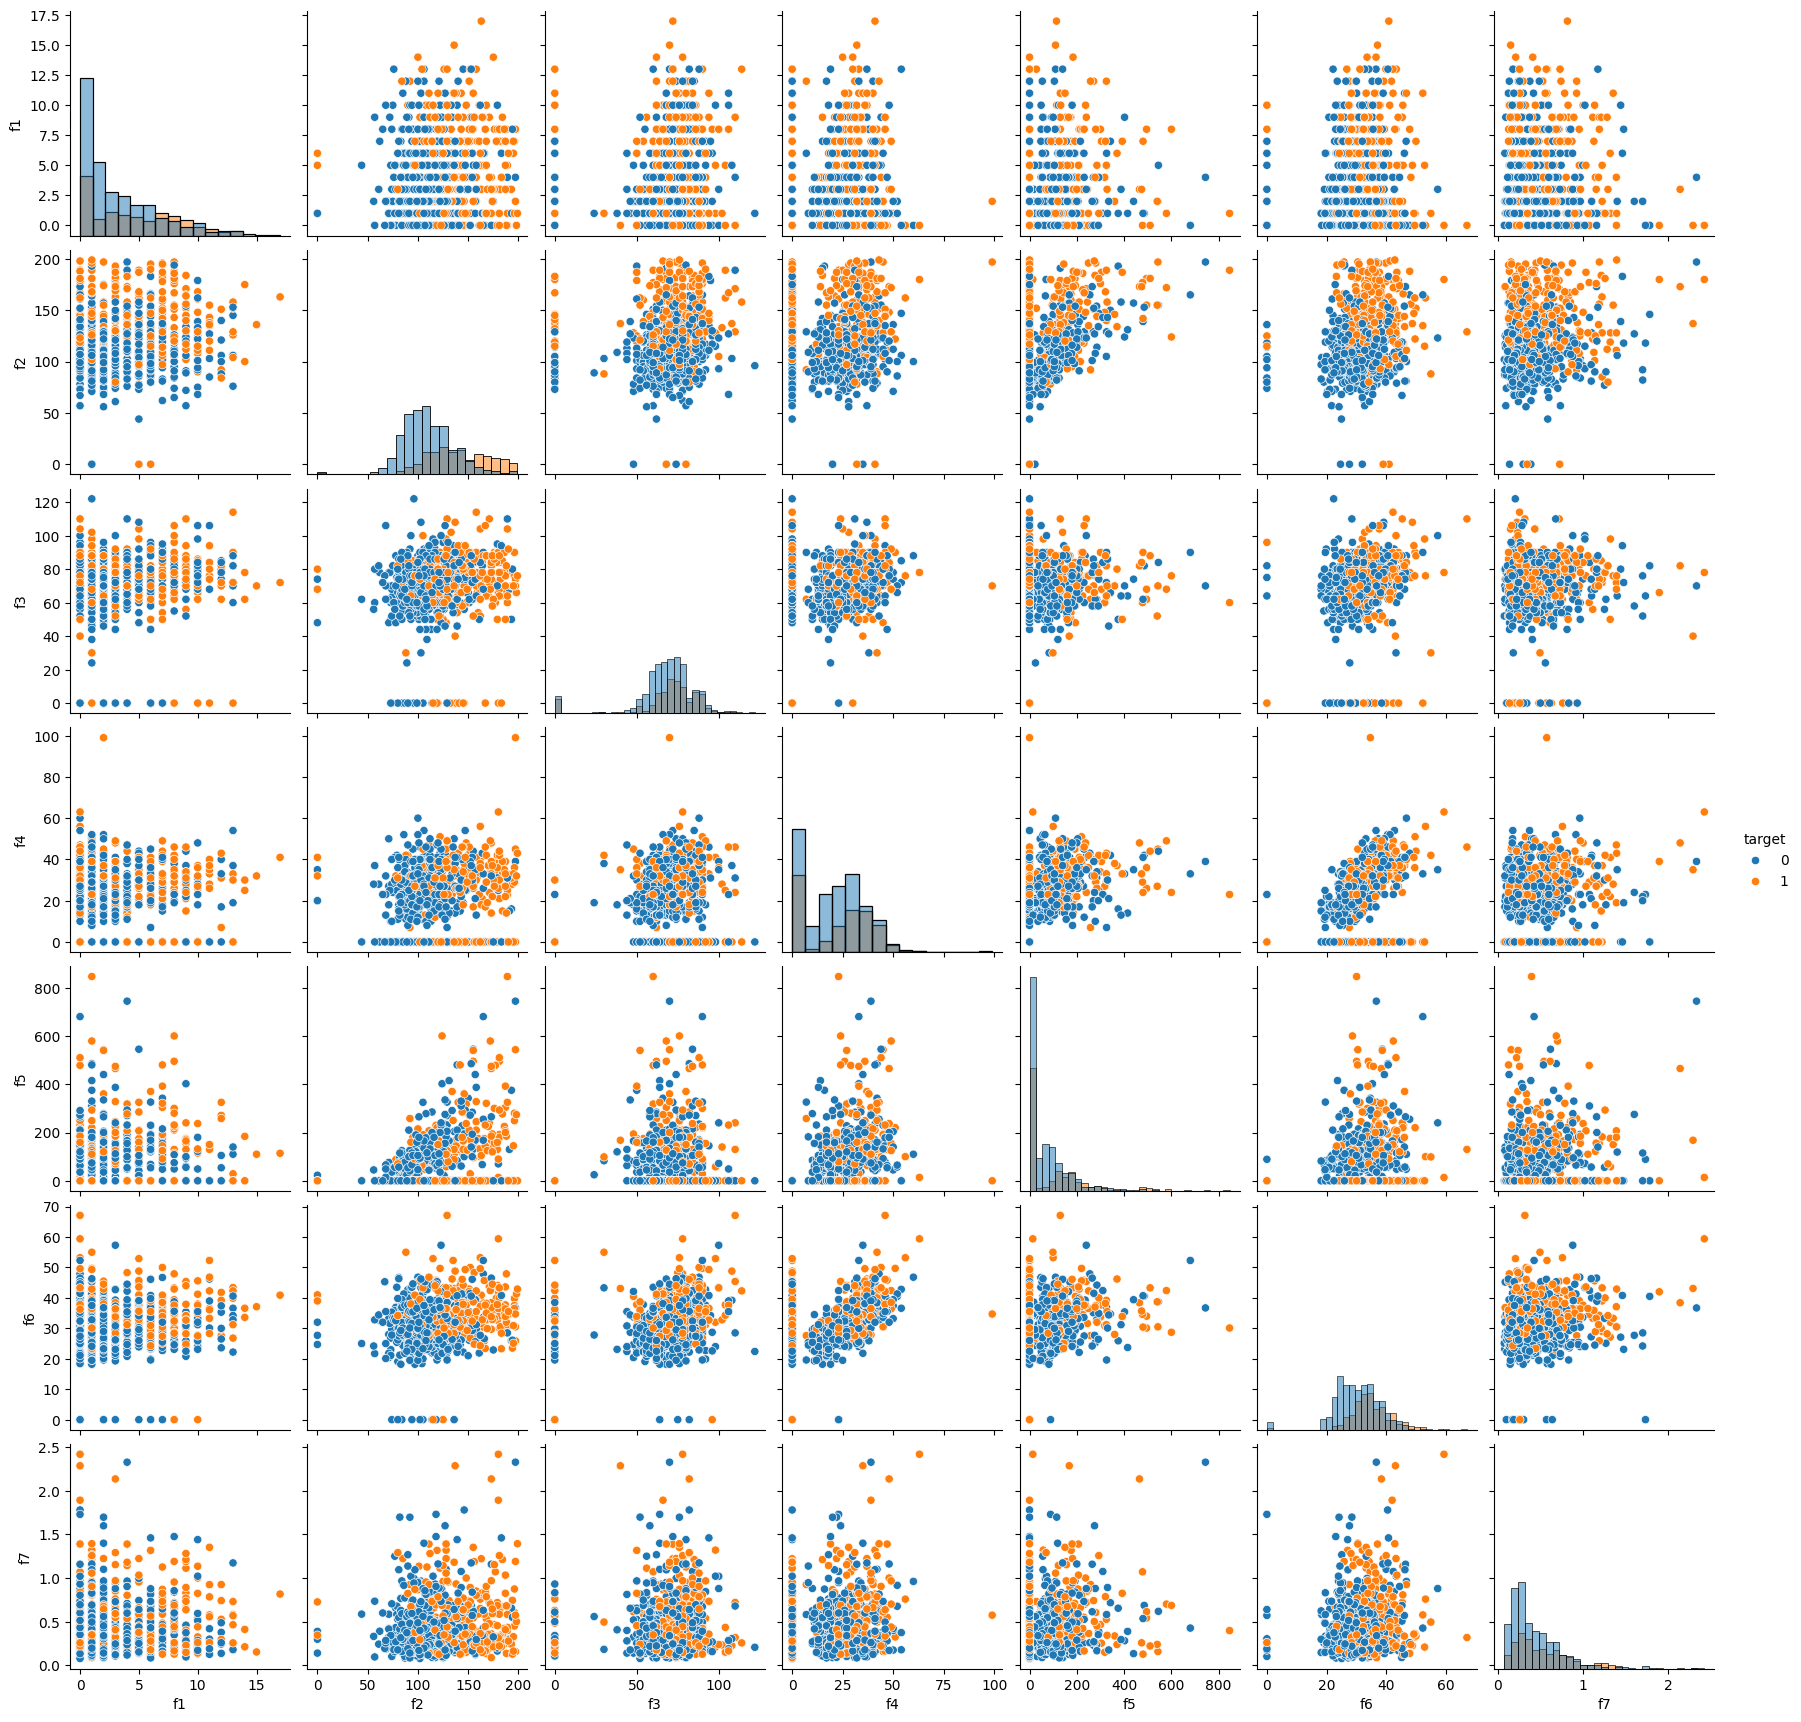

In [ ]:

plot_cols = [c for c in df_clean.select_dtypes(include=[np.number]).columns if c != "target"]
pp_df = df_clean[plot_cols + (["target"] if "target" in df_clean.columns else [])].dropna()
sns.pairplot(pp_df, hue=("target" if "target" in pp_df.columns else None), diag_kind="hist")
plt.show()

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      766 non-null    float64
 1   f2      766 non-null    float64
 2   f3      766 non-null    int64  
 3   f4      766 non-null    float64
 4   f5      766 non-null    float64
 5   f6      766 non-null    float64
 6   f7      766 non-null    float64
 7   target  766 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.0 KB


wont go for one hot encoding since all columns are already numerical.

In [ ]:
feat_cols = [c for c in df_clean.columns if c != "target"]
X = df_clean[feat_cols].to_numpy(dtype=np.float32)
y = df_clean["target"].to_numpy().ravel()
train_ratio, val_ratio, test_ratio = 0.70, 0.15, 0.15
assert abs(train_ratio + val_ratio + test_ratio - 1.0) < 1e-8
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42, stratify=y)
val_size_rel = val_ratio / (train_ratio + val_ratio)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=val_size_rel, random_state=42, stratify=y_train_full
)
print({"train": X_train.shape[0],"val": X_val.shape[0],"test": X_test.shape[0]})


{'train': 536, 'val': 115, 'test': 115}


In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np, torch

# interaction-only degree=3 features (no pure powers), then scale
poly = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
Xtr_p = poly.fit_transform(X_train)
Xva_p = poly.transform(X_val)
Xte_p = poly.transform(X_test)

scaler = StandardScaler().fit(Xtr_p)
Xtr = scaler.transform(Xtr_p).astype(np.float32)
Xva = scaler.transform(Xva_p).astype(np.float32)
Xte = scaler.transform(Xte_p).astype(np.float32)

X_train_t = torch.from_numpy(Xtr)
y_train_t = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
X_val_t   = torch.from_numpy(Xva)
y_val_t   = torch.from_numpy(y_val.astype(np.float32).reshape(-1, 1))
X_test_t  = torch.from_numpy(Xte)
y_test_t  = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

in_features = Xtr.shape[1]

ANs1 . NO. of Input layer nodes are 7 as there are 7 input features in our dataset.

Ans. 2 There are 1 output neuron with activation sigmoid since we are doing binary classification.

Ans3. There are 3 hidden layers. Each has activation function relu, and there is one node in output layer with activation sigmoid.

Ans4. 3 hidden layers afre used in the NN

Ans5. 64 nodes for first kayer, 32 nodes for second layer and 16 nodes for third layer


In [ ]:
# ===== Model (MyNN) =====
import torch, torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class MyNN(nn.Module):
    def __init__(self, in_features, p1=0.1, p2=0.1, p3=0.1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_features, 64), nn.BatchNorm1d(64), nn.ReLU(), nn.Dropout(p1),
            nn.Linear(64, 32),          nn.BatchNorm1d(32), nn.ReLU(), nn.Dropout(p2),
            nn.Linear(32, 16),          nn.BatchNorm1d(16), nn.ReLU(), nn.Dropout(p3),
            nn.Linear(16, 1)  # logits
        )
    def forward(self, x): return self.net(x)

model = MyNN(in_features).to(device)

In [ ]:
batch_size = 32
summary(
    model,
    input_size=(batch_size, in_features),
    col_names=("input_size", "output_size", "num_params", "kernel_size"),
    depth=3,
    device=device
)


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape
MyNN                                     [32, 63]                  [32, 1]                   --                        --
├─Sequential: 1-1                        [32, 63]                  [32, 1]                   --                        --
│    └─Linear: 2-1                       [32, 63]                  [32, 64]                  4,096                     --
│    └─BatchNorm1d: 2-2                  [32, 64]                  [32, 64]                  128                       --
│    └─ReLU: 2-3                         [32, 64]                  [32, 64]                  --                        --
│    └─Dropout: 2-4                      [32, 64]                  [32, 64]                  --                        --
│    └─Linear: 2-5                       [32, 64]                  [32, 32]                  2,080                     --
│    └─BatchNo

In [ ]:
!pip install optim

  Preparing metadata (setup.py) ... done
  Created wheel for optim: filename=optim-0.1.0-py2.py3-none-any.whl size=2705 sha256=1286d054b701a369f684e2944f60fa39391545e39cfcda589289e6e1d38553ea
  Stored in directory: /root/.cache/pip/wheels/a1/26/4f/f8d6e493d6f4b4adb0a3b7e16a4263dee709cb8c7f035ab737
Successfully built optim


In [ ]:
# ===== Loss =====
import torch, torch.nn as nn

pos = (y_train_t == 1).sum().item()
neg = (y_train_t == 0).sum().item()
pos_weight = torch.tensor([neg / max(pos, 1)], dtype=torch.float32, device=device)

loss_function = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

print(f"pos={pos}, neg={neg}, pos_weight={pos_weight.item():.3f}")


pos=188, neg=348, pos_weight=1.851


In [ ]:
import torch.optim as optim
optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 256

train_ds = TensorDataset(X_train_t, y_train_t)
val_ds   = TensorDataset(X_val_t,   y_val_t)

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True,  drop_last=False, num_workers=0)
val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False, drop_last=False, num_workers=0)

print("Loaders ready:", len(train_ds), "train /", len(val_ds), "val")


Loaders ready: 536 train / 115 val


In [ ]:
import time
epochs = 100
for epoch in range(1, epochs + 1):
    t0 = time.time()
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    model.eval()
    val_loss_sum, val_count = 0.0, 0
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = model(val_inputs)
            val_loss = loss_function(val_outputs, val_labels)
            val_loss_sum += val_loss.item() * val_inputs.size(0)
            val_count += val_inputs.size(0)
    print(f"Epoch {epoch:02d} | val_loss={(val_loss_sum/val_count):.4f} | time={(time.time()-t0):.2f}s")


Epoch 01 | val_loss=0.9057 | time=0.18s
Epoch 02 | val_loss=0.8937 | time=0.05s
Epoch 03 | val_loss=0.8820 | time=0.03s
Epoch 04 | val_loss=0.8695 | time=0.03s
Epoch 05 | val_loss=0.8563 | time=0.03s
Epoch 06 | val_loss=0.8426 | time=0.03s
Epoch 07 | val_loss=0.8283 | time=0.03s
Epoch 08 | val_loss=0.8117 | time=0.03s
Epoch 09 | val_loss=0.7968 | time=0.03s
Epoch 10 | val_loss=0.7820 | time=0.04s
Epoch 11 | val_loss=0.7676 | time=0.08s
Epoch 12 | val_loss=0.7524 | time=0.07s
Epoch 13 | val_loss=0.7454 | time=0.07s
Epoch 14 | val_loss=0.7365 | time=0.08s
Epoch 15 | val_loss=0.7317 | time=0.07s
Epoch 16 | val_loss=0.7276 | time=0.16s
Epoch 17 | val_loss=0.7220 | time=0.03s
Epoch 18 | val_loss=0.7193 | time=0.04s
Epoch 19 | val_loss=0.7114 | time=0.04s
Epoch 20 | val_loss=0.7038 | time=0.04s
Epoch 21 | val_loss=0.6962 | time=0.10s
Epoch 22 | val_loss=0.6898 | time=0.04s
Epoch 23 | val_loss=0.6838 | time=0.03s
Epoch 24 | val_loss=0.6826 | time=0.03s
Epoch 25 | val_loss=0.6842 | time=0.03s


In [ ]:
# ===== Train / Save Best (FULL CELL REPLACEMENT) =====
import os, torch
from torch.nn.utils import clip_grad_norm_

os.makedirs("artifacts", exist_ok=True)

# LR scheduler on validation loss
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.5, patience=3
)

best_val = float("inf")
patience, waited = 10, 0
epochs = 100
eps = 0.0  # TURN OFF label smoothing to favor peak accuracy

train_losses = []
val_losses = []

for epoch in range(1, epochs + 1):
    # ----- train -----
    model.train()
    train_loss_sum, train_count = 0.0, 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)

        logits = model(xb)
        loss = loss_function(logits, yb)  # use true labels (no smoothing)

        optimizer.zero_grad()
        loss.backward()
        clip_grad_norm_(model.parameters(), max_norm=2.0)
        optimizer.step()

        train_loss_sum += loss.item() * xb.size(0)
        train_count += xb.size(0)

    train_loss = train_loss_sum / max(train_count, 1)
    train_losses.append(train_loss)

    # ----- validate -----
    model.eval()
    val_loss_sum, val_count = 0.0, 0
    with torch.no_grad():
        for vb, vy in val_loader:
            vb, vy = vb.to(device), vy.to(device)
            vlogits = model(vb)
            vloss = loss_function(vlogits, vy)
            val_loss_sum += vloss.item() * vb.size(0)
            val_count += vb.size(0)

    val_loss = val_loss_sum / max(val_count, 1)
    val_losses.append(val_loss)

    # scheduler step on validation loss
    scheduler.step(val_loss)

    # checkpoint best
    if val_loss < best_val:
        best_val, waited = val_loss, 0
        torch.save({k: v.detach().cpu() for k, v in model.state_dict().items()},
                   "artifacts/mynn_best.pt")
    else:
        waited += 1
        if waited >= patience:
            print(f"Early stopping at epoch {epoch:02d}")
            break

    print(f"Epoch {epoch:02d} | train_loss={train_loss:.4f} | val_loss={val_loss:.4f}")

Epoch 01 | train_loss=0.5700 | val_loss=0.6498
Epoch 02 | train_loss=0.5658 | val_loss=0.6506
Epoch 03 | train_loss=0.5589 | val_loss=0.6520
Epoch 04 | train_loss=0.5693 | val_loss=0.6495
Epoch 05 | train_loss=0.5407 | val_loss=0.6483
Epoch 06 | train_loss=0.5541 | val_loss=0.6508
Epoch 07 | train_loss=0.5421 | val_loss=0.6508
Epoch 08 | train_loss=0.5699 | val_loss=0.6518
Epoch 09 | train_loss=0.5359 | val_loss=0.6538
Epoch 10 | train_loss=0.5610 | val_loss=0.6507
Epoch 11 | train_loss=0.5390 | val_loss=0.6513
Epoch 12 | train_loss=0.5485 | val_loss=0.6519
Epoch 13 | train_loss=0.5560 | val_loss=0.6523
Epoch 14 | train_loss=0.5542 | val_loss=0.6517
Early stopping at epoch 15


In [ ]:
# ===== Evaluation =====
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from torch.utils.data import TensorDataset, DataLoader

# loaders (reuse or create fresh)
val_loader  = DataLoader(TensorDataset(X_val_t,  y_val_t),  batch_size=batch_size, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test_t, y_test_t), batch_size=batch_size, shuffle=False)

# load best
model = MyNN(in_features).to(device)
model.load_state_dict(torch.load("artifacts/mynn_best.pt", map_location=device))
model.eval()

# tune threshold on validation
val_prob, val_true = [], []
with torch.no_grad():
    for xb, yb in val_loader:
        xb = xb.to(device)
        p = torch.sigmoid(model(xb))
        val_prob.extend(p.squeeze(1).cpu().numpy()); val_true.extend(yb.squeeze(1).cpu().numpy())
val_prob = np.array(val_prob, float); val_true = np.array(val_true, int)
ths = np.linspace(0.05, 0.95, 181)
best_t = ths[int(np.argmax([accuracy_score(val_true, (val_prob >= t).astype(int)) for t in ths]))]

# test metrics
y_prob, y_true = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        p = torch.sigmoid(model(xb))
        y_prob.extend(p.squeeze(1).cpu().numpy()); y_true.extend(yb.squeeze(1).cpu().numpy())
y_prob = np.array(y_prob, float); y_true = np.array(y_true, int)
y_pred = (y_prob >= best_t).astype(int)

acc = accuracy_score(y_true, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", zero_division=0)
print(f"Best threshold (val): {best_t:.3f}")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")


Best threshold (val): 0.615
Accuracy: 0.7565
Precision: 0.6250 | Recall: 0.7500 | F1: 0.6818


In [ ]:
import torch

with torch.no_grad():
    train_outputs = model(X_train_t.to(device))
    _, train_preds = torch.max(train_outputs, dim=1)
    train_acc = (train_preds == y_train_t.to(device)).float().mean()
print(f"Training Accuracy: {train_acc:.4f}")

with torch.no_grad():
    val_outputs = model(X_val_t.to(device))
    _, val_preds = torch.max(val_outputs, dim=1)
    val_acc = (val_preds == y_val_t.to(device)).float().mean()
print(f"Validation Accuracy: {val_acc:.4f}")



Training Accuracy: 0.6493
Validation Accuracy: 0.6522


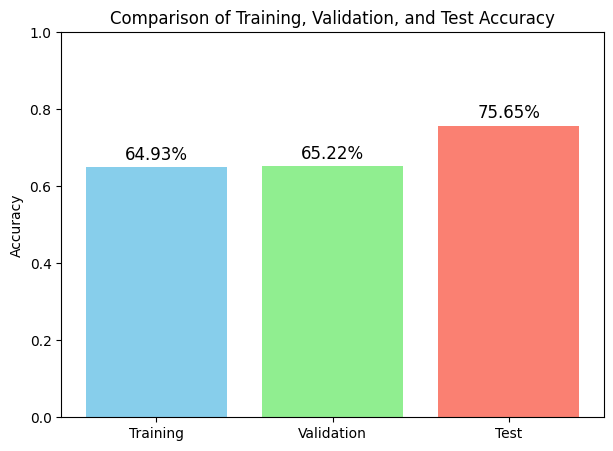

In [ ]:
train_accuracy = 0.6493
val_accuracy   = 0.6522
test_accuracy  = 0.7565

labels = ['Training', 'Validation', 'Test']
accuracies = [train_accuracy, val_accuracy, test_accuracy]

plt.figure(figsize=(7,5))
plt.bar(labels, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparison of Training, Validation, and Test Accuracy')

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc*100:.2f}%", ha='center', fontsize=12)

plt.show()

In [ ]:
torch.save(model.state_dict(), 'a2_part2_weights_aarjavja_suhachow.pth')

Test Loss: 0.6795


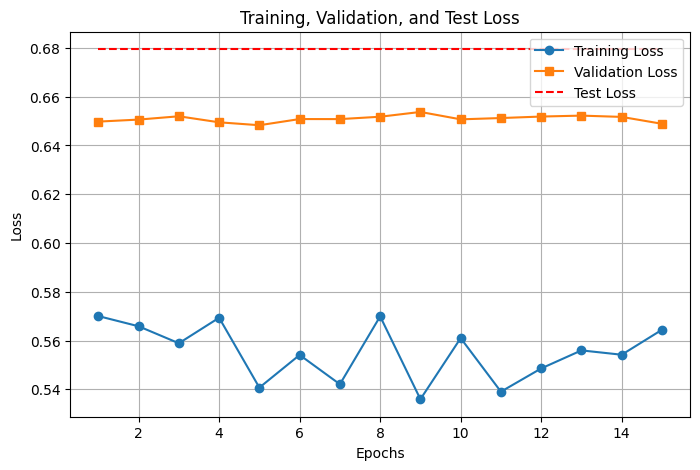

In [ ]:
# ===== Calculate Test Loss and Plot =====
import torch
from torch.utils.data import TensorDataset, DataLoader

# Assume best_t, X_test_t, y_test_t, device, model, and loss_function are defined
# If not, make sure to run previous cells to define them

# Create test DataLoader
test_ds = TensorDataset(X_test_t, y_test_t)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

# Calculate test loss
model.eval()
test_loss_sum, test_count = 0.0, 0
with torch.no_grad():
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        logits = model(xb)
        loss = loss_function(logits, yb)
        test_loss_sum += loss.item() * xb.size(0)
        test_count += xb.size(0)

test_loss = test_loss_sum / max(test_count, 1)
print(f"Test Loss: {test_loss:.4f}")

# Plotting
epochs = range(1, len(train_losses)+1)

plt.figure(figsize=(8,5))

plt.plot(epochs, train_losses, 'o-', label='Training Loss')
plt.plot(epochs, val_losses, 's-', label='Validation Loss')

plt.hlines(test_loss, 1, len(train_losses), colors='r', linestyles='--', label='Test Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.grid(True)
plt.show()

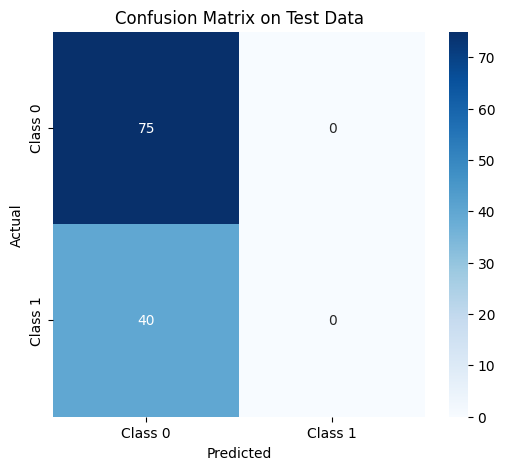

In [ ]:
from sklearn.metrics import confusion_matrix
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.append(preds)
        all_labels.append(labels)

all_preds = torch.cat(all_preds)
all_labels = torch.cat(all_labels)

y_true = all_labels.cpu().numpy()
y_pred = all_preds.cpu().numpy()

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0','Class 1'], yticklabels=['Class 0','Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Data')
plt.show()

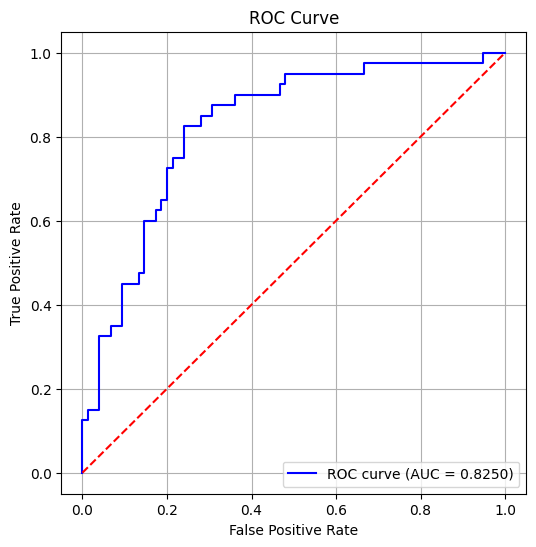

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

model.eval()
all_probs = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)

        probs = torch.sigmoid(outputs) # Use sigmoid for binary classification
        all_probs.append(probs.squeeze(1).cpu().numpy())
        all_labels.append(labels.cpu().numpy())

all_probs = np.concatenate(all_probs)
all_labels = np.concatenate(all_labels)

fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
auc_score = roc_auc_score(all_labels, all_probs)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()